In [152]:
import numpy as np 
from math import pi
import sympy as sy
import matplotlib.pyplot as plt 
from numba import jit

In [153]:
N = 1000
dx = 0.001

x = np.linspace(-N/2*dx, (N/2-1)*dx, N, endpoint=False)
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.exp(-x**2)
# y = np.sin(2*pi*x) + 2*np.sin(10*2*pi*x) + 3*np.sin(20*2*pi*x) + 4*np.sin(30*2*pi*x)
y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)

In [154]:
# calculate f_p

px = 1/2/pi
# px = stats.norm.pdf(x, loc=0, scale=1)
fp = np.sqrt(px) * (y - np.mean(y))

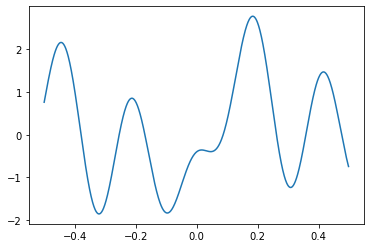

In [155]:
plt.plot(x, y)
plt.show()

In [156]:
import tensorflow as tf 
from tensorflow import keras 

In [157]:
# training the function with NN 

# random sample from U(-pi,pi)
# x_train = np.random.uniform(-pi,pi,512)
x_train = np.random.normal(0, 1, 1000)
y_train = np.sin(x_train) + np.sin(10*x_train+b1) + np.sin(20*x_train+b2) + np.sin(30*x_train+b3)
# y_train = np.sin(2*pi*x_train) + 2*np.sin(10*2*pi*x_train) + 3*np.sin(20*2*pi*x_train) + 4*np.sin(30*2*pi*x_train)

# reshaping 
x_train = x_train.reshape((len(x_train), 1))
# print(len(x_train))
y_train = y_train.reshape((len(y_train), 1))
# print(len(y_train))

In [158]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, hidden_layer_1,
                          hidden_layer_2, hidden_layer_3, 
                          hidden_layer_4, hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [159]:
# fitting the data 
beta = model.fit(x_train, y_train, epochs=1000, batch_size=32)

# predicting the data
predict_1 = model.predict(x)

Epoch 1/1000
32/32 [==============================] - 0s 645us/step - loss: 2.0812
Epoch 2/1000
32/32 [==============================] - 0s 645us/step - loss: 1.9311
Epoch 3/1000
32/32 [==============================] - 0s 710us/step - loss: 1.9366
Epoch 4/1000
32/32 [==============================] - 0s 645us/step - loss: 1.9114
Epoch 5/1000
32/32 [==============================] - 0s 645us/step - loss: 1.9287
Epoch 6/1000
32/32 [==============================] - 0s 645us/step - loss: 1.9123
Epoch 7/1000
32/32 [==============================] - 0s 645us/step - loss: 1.9124
Epoch 8/1000
32/32 [==============================] - 0s 613us/step - loss: 1.8775
Epoch 9/1000
32/32 [==============================] - 0s 613us/step - loss: 1.8067
Epoch 10/1000
32/32 [==============================] - 0s 581us/step - loss: 1.6307
Epoch 11/1000
32/32 [==============================] - 0s 581us/step - loss: 1.5287
Epoch 12/1000
32/32 [==============================] - 0s 611us/step - loss: 1.5358
E

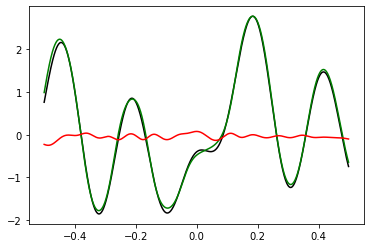

In [160]:
# compute r
predict_1 = predict_1.reshape(N)
r = y - predict_1

plt.plot(x, y, color='black')
plt.plot(x, predict_1, color='green')
plt.plot(x, r, color='red')
plt.show()

In [161]:
# define the function includes w0

d = 1
px = 1/2/pi
fp = np.sqrt(px) * (y_train - np.mean(y_train))
# print(fp)

@jit(nopython=True)
def f_approx(w0):
    f = 0
    for i in range(N-1):
        for j in range(N-1): 
            sinc = 1
            if d == 1: 
                K = [1]
            else: 
                K = range(1,d)
            for k in K: 
                t = w0*(x_train[j]**k - x_train[i]**k)
                if t == 0: 
                    sinc = sinc * 1
                else: 
                    sinc = sinc * np.sin(t) / t
            f = f + fp[i]*fp[j]/px/px * (w0/pi)**d * sinc 
    f = f * 2 / (N**2)
    return f      

# print(f_approx(10))

In [162]:
W = np.linspace(-N, N, 2*N+1)
# print(W)
f_w = np.zeros(2*N+1)

for w in W: 
    i = w + N
    i = int(i)
    f_w[i] = f_approx(w)
# print(f_w)

y_var = np.var(y_ts)
# print(y_var)

plt.plot(W, f_w)
plt.axhline(y = y_var)
plt.show()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot unify Literal[int](0) and array(float64, 1d, C) for 'f.3', defined at <ipython-input-161-5ee96ff01f36> (24)
[1m
File "<ipython-input-161-5ee96ff01f36>", line 24:[0m
[1mdef f_approx(w0):
    <source elided>
                    sinc = sinc * np.sin(t) / t
[1m            f = f + fp[i]*fp[j]/px/px * (w0/pi)**d * sinc 
[0m            [1m^[0m[0m
[0m
[0m[1mDuring: typing of assignment at <ipython-input-161-5ee96ff01f36> (24)[0m
[1m
File "<ipython-input-161-5ee96ff01f36>", line 24:[0m
[1mdef f_approx(w0):
    <source elided>
                    sinc = sinc * np.sin(t) / t
[1m            f = f + fp[i]*fp[j]/px/px * (w0/pi)**d * sinc 
[0m            [1m^[0m[0m
